In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

RESOLVER VARIOS PROBLEMAS

Las graficas de barras por cluster y partidos politicos agrupados no funcionan

los 3 partidos mas votados en cada cluster parece que se hubiera borrado el codigo, comprobar

In [ ]:
#Imports
import numpy as np
import pandas as pd

import operator
import math

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

In [ ]:
#To read files from a Google Colab environment
from google.colab import files
import io

uploaded = files.upload()
uploaded

{}

In [ ]:
 #Campos que nos interesan para este estudio
Campos = ['CCAA','SEXO','EDAD','P0','PREFPTE','PROBVOTO','SIMPATIA','PARTICIPACIONG','RECUVOTOG','NIVELESTENTREV','RELIGION','ECIVIL','SITLAB','RELALAB','CNO11','INGRESHOG','CLASESOCIAL','INTENCIONGR','ESTUDIOS','CNO11R','PESO','PESOCCAA']

In [ ]:
import pandas as pd

# Cargar el archivo CSV con el separador decimal correcto
df = pd.read_csv('3468_num.csv', sep=';', decimal=',')
df_filtered = df[Campos]
# Verificar las primeras filas para asegurarnos de que los datos se cargaron correctamente
df_filtered.head()
df_filtered.info()

FileNotFoundError: [Errno 2] No such file or directory: '3468_num.csv'

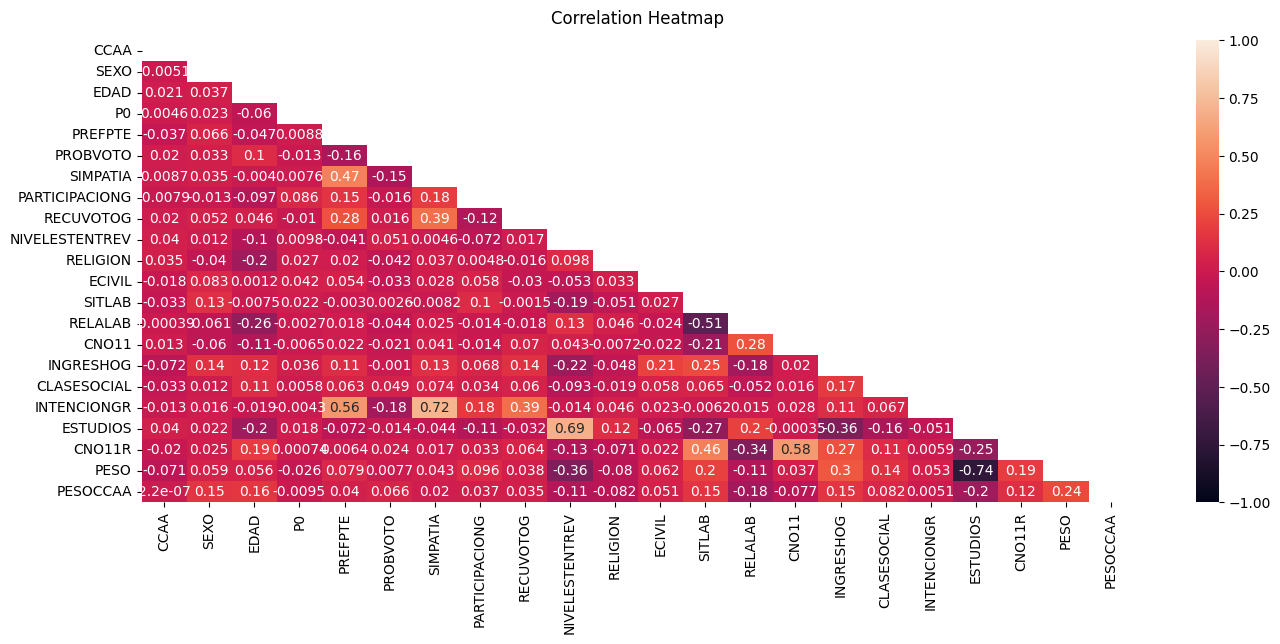

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Use bool instead of np.bool
mask = np.triu(np.ones_like(df_filtered.corr(), dtype=bool))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_filtered.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

A partir del mapa de correlaciones y las descripciones de los campos, aquí hay algunas observaciones interesantes:

1. **SIMPATIA y PROBVOTO (Partido político y probabilidad de votar):** Hay una correlación positiva bastante fuerte entre **SIMPATIA** (la simpatía hacia un partido) y **PROBVOTO** (probabilidad de votar), con un valor de correlación de **0.47**. Esto sugiere que las personas que sienten más simpatía por un partido también tienden a reportar una mayor probabilidad de votar.

2. **EDAD y INGRESHOG (Edad e ingresos del hogar):** Existe una correlación positiva moderada entre **EDAD** e **INGRESHOG** (**0.14**). Esto puede indicar que a medida que las personas envejecen, es más probable que reporten ingresos más altos en su hogar, lo que podría estar relacionado con el progreso profesional y estabilidad económica con el tiempo.

3. **ESTUDIOS y SIMPATIA:** Existe una correlación fuerte de **0.69** entre **ESTUDIOS** (nivel educativo) y **SIMPATIA** (simpatía hacia un partido político), lo cual sugiere que el nivel educativo puede influir notablemente en la simpatía que alguien tiene hacia un partido político específico.

4. **CLASESOCIAL y CNO11 (Clase social y ocupación):** Hay una correlación significativa entre **CLASESOCIAL** y **CNO11** (ocupación), con un valor de **0.46**. Esto es consistente con la expectativa de que la ocupación influye en cómo las personas se perciben en términos de clase social.


5. **RELALAB y CNO11:** Se observa una correlación negativa fuerte entre **RELALAB** (situación profesional) y **CNO11** (ocupación), con un valor de **-0.51**, lo que podría indicar que ciertos tipos de ocupación están asociados con una menor estabilidad laboral o que ciertas categorías ocupacionales tienen relaciones inversas con la estabilidad profesional percibida.



Estas correlaciones destacan relaciones que pueden ser útiles para inferir comportamientos de voto, factores económicos y cómo variables sociodemográficas como el nivel educativo o la ocupación se relacionan con las percepciones políticas y sociales.

PROCEDEREMOS PRIMERO CON UN ANALISIS DESCRIPTIVO DE LOS DATOS

Agruparemos por intencion de voto

In [ ]:
partidos_dict = {
    1: 'PSOE',
    2: 'PP',
    3: 'VOX',
    6: 'PACMA',
    8: 'Podemos',
    21: 'Sumar',
    28: 'Se Acabó la Fiesta',
    503: 'CCa',
    901: 'ERC',
    902: 'Junts',
    1201: 'BNG',
    1501: 'UPN',
    1601: 'EAJ-PNV',
    1602: 'EH Bildu',
    8995: 'Otro partido',
    8996: 'En blanco',
    9977: 'Voto nulo',
    9997: 'No votaría',
    9998: 'No sabe todavía',
    9999: 'N.C.'
}

In [ ]:
# Asegurarse de que ya tienes el mapeo de partidos aplicado
df_filtered['INTENCIONGR_NOMBRE'] = df_filtered['INTENCIONGR'].map(partidos_dict)

# Excluir valores no válidos (por ejemplo, 'No votaría', 'N.C.')
valores_invalidos = ['No votaría', 'N.C.', 'En blanco', 'Voto nulo', 'No sabe todavía']
df_filtered_valid = df_filtered[~df_filtered['INTENCIONGR_NOMBRE'].isin(valores_invalidos)]

# Obtener los partidos únicos en la columna de intención de voto
partidos_unicos = df_filtered_valid['INTENCIONGR_NOMBRE'].unique()

# Para cada partido, analizar el perfil de los votantes
for partido in partidos_unicos:
    print(f"\nAnálisis del perfil del votante de {partido}:")

    # Filtrar por partido
    df_partido = df_filtered_valid[df_filtered_valid['INTENCIONGR_NOMBRE'] == partido]

    # Obtener estadísticas descriptivas
    perfil_partido = df_partido[['SEXO','EDAD','RELIGION','ECIVIL','SITLAB','RELALAB','CNO11','INGRESHOG','CLASESOCIAL','INTENCIONGR','ESTUDIOS'
]].describe()

    # Mostrar estadísticas del partido
    print(perfil_partido)

<ipython-input-97-ac2a8fe417d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['INTENCIONGR_NOMBRE'] = df_filtered['INTENCIONGR'].map(partidos_dict)



Análisis del perfil del votante de PP:
             SEXO        EDAD    RELIGION      ECIVIL      SITLAB     RELALAB  \
count  846.000000  846.000000  846.000000  846.000000  846.000000  846.000000   
mean     1.452719   52.732861    2.295508    1.793144    1.977541    0.842790   
std      0.498054   16.240268    1.558380    1.237864    1.732588    0.998277   
min      1.000000   18.000000    1.000000    1.000000    1.000000    0.000000   
25%      1.000000   42.000000    1.000000    1.000000    1.000000    0.000000   
50%      1.000000   53.000000    2.000000    1.000000    1.000000    1.000000   
75%      2.000000   64.000000    2.000000    2.000000    2.000000    1.000000   
max      2.000000   92.000000    9.000000    9.000000    8.000000    9.000000   

            CNO11   INGRESHOG  CLASESOCIAL  INTENCIONGR   ESTUDIOS  
count  846.000000  846.000000   846.000000        846.0  846.00000  
mean     2.452719    3.304965     8.644208          2.0    5.13357  
std      7.795584    1.

1. Perfil del votante de PP:

    Sexo: Los votantes del PP se distribuyen de manera más equitativa entre hombres y mujeres, con una media de 1.45. Esto indica una ligera mayor presencia de hombres.

    Edad: La media de edad es de 52.7 años, lo que indica que el grupo votante tiende a ser mayor. La edad va desde los 18 hasta los 92 años, con una gran variabilidad.

    Religión: La media es de 2.29, lo que indica que los votantes del PP tienden a ser más religiosos en comparación con otros partidos.

    Estado civil: La media de 1.79 sugiere que muchos están casados o en relaciones formales.

    Situación laboral: La mayoría de los votantes parecen estar trabajando o en una posición estable (media de 1.97).

    Clase social: La media es de 8.64, lo que sugiere una mayor presencia de votantes de clase media-alta.

    Estudios: El nivel educativo es intermedio, con una media de 5.13.

2. Perfil del votante de PSOE:

    Sexo: La media es de 1.55, lo que indica una ligera mayor presencia de mujeres en comparación con el PP.

    Edad: La media es de 53.1 años, similar a la del PP, pero con una leve tendencia hacia votantes mayores.

    Religión: Con una media de 3.77, los votantes del PSOE son menos religiosos que los del PP.

    Estado civil: La media es de 1.85, lo que sugiere una situación marital similar a la del PP.

    Situación laboral: La media de 2.05 indica que la mayoría de los votantes del PSOE están empleados o en situaciones laborales estables.

    Clase social: La media es de 10.02, lo que sugiere una mezcla de clases, con votantes predominantemente de clase media y baja.

    Estudios: La media es de 4.98, similar al PP, lo que sugiere una educación intermedia.

3. Perfil del votante de VOX:

    Sexo: La media es de 1.34, lo que indica que la mayoría de los votantes de VOX son hombres.

    Edad: Con una media de 45.3 años, los votantes de VOX tienden a ser más jóvenes en comparación con los de PP y PSOE.

    Religión: La media es de 2.60, lo que sugiere que los votantes de VOX son religiosos, aunque no tanto como los del PP.

    Estado civil: La media es de 1.82, lo que indica que muchos están casados o en relaciones estables.

    Situación laboral: La media de 2.11 sugiere que la mayoría están empleados.

    Clase social: Con una media de 11.66, los votantes de VOX se ubican en su mayoría en una clase media-alta.

    Estudios: La media es de 4.65, lo que indica un nivel educativo ligeramente más bajo que los votantes de PP y PSOE.

4. Perfil del votante de Podemos:

    Sexo: La media es de 1.52, lo que indica una distribución relativamente equilibrada entre hombres y mujeres, con una ligera predominancia de hombres.

    Edad: La media es de 46.3 años, lo que sugiere que los votantes de Podemos son relativamente jóvenes.

    Religión: Con una media de 5.15, los votantes de Podemos son bastante seculares, siendo el partido con el votante menos religioso entre los analizados.

    Estado civil: La media es de 1.82, similar a la de VOX, lo que indica una mezcla de personas solteras y casadas.

    Situación laboral: La media es de 2.23, lo que sugiere que muchos votantes de Podemos están empleados.

    Clase social: Con una media de 9.75, sus votantes tienden a estar en la clase media.

    Estudios: La media es de 5.23, indicando un nivel educativo intermedio, pero similar al de otros partidos.

5. Perfil del votante de Sumar:

    Sexo: La media es de 1.46, lo que indica una ligera mayor presencia de hombres.

    Edad: La media es de 46.4 años, similar a la de Podemos, lo que sugiere que Sumar también tiene una base de votantes relativamente jóvenes.

    Religión: La media es de 4.57, lo que indica que los votantes de Sumar tienden a ser seculares, pero menos que los de Podemos.
    Estado civil: La media de 1.84 sugiere que hay una mezcla de votantes solteros y casados.

    Situación laboral: La media de 1.93 indica que la mayoría de los votantes están empleados.

    Clase social: Con una media de 6.86, los votantes de Sumar tienden a estar en la clase media o media-baja.

    Estudios: El nivel educativo es de 5.42, lo que sugiere que los votantes de Sumar tienen un nivel educativo intermedio, y superior al de Podemos.

6. Perfil del votante de Se Acabó la Fiesta:

    Sexo: La media es de 1.31, lo que indica que la mayoría de los votantes son hombres.

    Edad: La media es de 41.8 años, lo que sugiere que los votantes de Se Acabó la Fiesta son más jóvenes en comparación con otros partidos.

    Religión: Con una media de 2.82, los votantes de este partido tienden a ser más religiosos que los de Podemos o Sumar, pero menos que los de VOX o PP.

    Estado civil: La media es de 1.95, lo que indica que muchos de los votantes están solteros o casados.

    Situación laboral: Con una media de 2.07, la mayoría de los votantes de este partido están trabajando.

    Clase social: La media es de 6.97, lo que sugiere que la mayoría de los votantes están en una clase social media-baja.

    Estudios: La media es de 5.07, lo que indica un nivel educativo intermedio, similar al de los votantes de PP, PSOE y Podemos.

* Conclusión general:

  -Edad: Los votantes de PP y PSOE son los mayores (con más de 52 años de media), mientras que los de VOX, Podemos, Sumar y Se Acabó la Fiesta son más jóvenes, especialmente estos últimos.

  -Religión: Los votantes más religiosos son los de PP, seguidos de VOX y Se Acabó la Fiesta, mientras que los menos religiosos son los de Podemos y Sumar.

  -Clase social: Los votantes de VOX y PP tienden a ser de clases más altas, mientras que los votantes de PSOE, Podemos, Sumar y Se Acabó la Fiesta están más en la clase media o media-baja.

  -Educación: El nivel educativo es relativamente similar entre todos los partidos, con una leve ventaja para Sumar y Podemos en cuanto a nivel educativo más alto.

¿Qué aporta?

  El análisis descriptivo proporciona un resumen estadístico de cada variable (edad, sexo, religión, clase social, etc.) para cada grupo de votantes, como las medias, desviaciones estándar, y otros valores como los percentiles.
  Permite entender el perfil promedio de los votantes de cada partido, identificando los valores centrales de las variables clave y comparando cómo varían estos promedios entre los votantes de diferentes partidos.
  Te ayuda a detectar patrones generales o anomalías (por ejemplo, si un grupo es mucho más joven o tiene un nivel educativo más bajo que los otros).

Limitaciones:

  El análisis descriptivo no capta la interrelación entre las variables. Por ejemplo, podrías ver que la mayoría de los votantes de un partido son hombres y jóvenes, pero no sabrías cómo se combinan esas características con otras (como el nivel educativo o la situación laboral).
  No agrupa automáticamente a los votantes en subgrupos más específicos dentro de cada partido. Solo da un perfil general basado en los promedios.

Análisis de clusters jerárquicos:

  ¿Qué aporta?

   * El análisis de clusters jerárquicos te permite agrupar a los votantes en función de múltiples variables simultáneamente (edad, sexo, clase social, intención de voto, etc.), sin basarse en promedios generales. Es una técnica de segmentación que permite crear subgrupos más homogéneos de votantes dentro de cada partido o entre partidos.
   * Identifica patrones ocultos: Puede revelar grupos de votantes con características comunes que el análisis descriptivo no detecta. Por ejemplo, podrías encontrar un grupo de votantes jóvenes de clase media que son más religiosos, algo que no se percibe fácilmente con promedios.
   *    Clarifica las diferencias entre los grupos: Mientras que el análisis descriptivo te da la media para todo el grupo de votantes de un partido, el análisis de clusters jerárquicos te permite ver diferentes perfiles dentro de ese mismo partido. Por ejemplo, dentro del partido X podrías encontrar un grupo de votantes jóvenes, urbanos y seculares, y otro grupo mayor, rural y religioso.
   *     Visualización de la estructura de agrupación: El dendrograma que resulta de un análisis jerárquico proporciona una representación visual de cómo se relacionan los distintos grupos de votantes, ayudándote a comprender qué variables tienen más peso en la diferenciación de los votantes.

  *Ventajas adicionales:
        * Agrupación más precisa: Te permite observar los perfiles más específicos dentro de cada partido, no solo uno general. Esto es crucial si quieres definir estrategias de comunicación más dirigidas para captar votantes.
        Identificación de subgrupos heterogéneos: Dentro de un mismo partido, el análisis de clusters puede ayudarte a encontrar grupos heterogéneos de votantes, lo que es útil para entender la diversidad interna en las preferencias y comportamientos.

3. Comparación y combinación de ambos enfoques:

  * El análisis descriptivo te da una vista panorámica de las características generales de los votantes de cada partido. Es ideal para tener una primera impresión de cómo son los votantes en términos generales.
 * El análisis de clusters jerárquicos te aporta un nivel más profundo de comprensión al segmentar a los votantes en grupos más específicos, revelando subgrupos que podrían no ser evidentes con el análisis descriptivo.

En conjunto, ambos enfoques te permitirán:

   * Definir el perfil global de los votantes de cada partido (con el análisis descriptivo).
  *  Segmentar a los votantes en grupos más pequeños con características similares dentro de cada partido, para crear estrategias más precisas de análisis o comunicación (con el análisis de clusters).

4. Aplicación práctica:

Si tu objetivo es establecer el perfil del votante de cada partido y además entender cómo varían los votantes dentro de cada partido, el análisis de clusters jerárquicos te permitirá:

  *  Descubrir si dentro del partido hay subgrupos con perfiles socioeconómicos distintos, como votantes jóvenes con estudios universitarios frente a votantes mayores con educación básica.
  *  Identificar patrones de votantes con intenciones de voto similares o que podrían ser susceptibles a cambiar su intención de voto según sus características.
 * Adaptar campañas electorales o mensajes según los diferentes segmentos de votantes encontrados en cada partido, ya que no todos los votantes del PP o PSOE, por ejemplo, son homogéneos.

1. Preparación de los datos:

    Nos aseguraremos de que los datos estén normalizados, ya que el análisis de clusters se ve afectado por las escalas de las variables. Normalizaremos las variables numéricas para que todas estén en la misma escala (por ejemplo, entre 0 y 1).
    

2. Selección de las variables relevantes:

    utilizaremos variables como 'SEXO', 'EDAD', 'RELIGION', 'ECIVIL', 'SITLAB', 'RELALAB', 'CNO11', 'INGRESHOG', 'CLASESOCIAL', 'INTENCIONGR', 'ESTUDIOS'. Estas nos permitirán agrupar a los votantes basándonos en sus características sociodemográficas y su intención de voto.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


In [ ]:
# Suponiendo que 'df_filtered' es tu DataFrame
# Variables relevantes
variables = ['SEXO', 'EDAD', 'RELIGION', 'ECIVIL', 'SITLAB', 'RELALAB', 'CNO11',
             'INGRESHOG', 'CLASESOCIAL', 'INTENCIONGR', 'ESTUDIOS']

# Filtramos el DataFrame con las columnas seleccionadas
df_cluster = df_filtered[variables]

# Revisamos si hay valores nulos y los manejamos si es necesario
df_cluster = df_cluster.dropna()

# Estandarización (normalización) de las variables numéricas
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)



3. Cálculo de la matriz de distancias:

    Para realizar el análisis de clusters jerárquicos, primero calcularemos una matriz de distancias que medirá cómo de "similares" o "diferentes" son los votantes entre sí, utilizando una métrica como la distancia euclidiana.

4. Aplicación del método de linkage:

    * Utilizaremos el método de linkage (enlace) para fusionar los clusters. Existen varios tipos como:
    * Complete linkage: Agrupa con base en la distancia máxima entre puntos.
    * Average linkage: Agrupa con base en la distancia promedio.
    * Ward linkage: Minimiza la varianza dentro de los clusters.

Probablemente utilizaremos Ward linkage por su capacidad de formar clusters compactos y esféricos.

5. Generación del dendrograma:

    * El dendrograma es la representación visual del análisis de clusters jerárquicos, donde veremos cómo se agrupan los votantes progresivamente.
    * A partir del dendrograma, determinaremos el número de clusters adecuados.

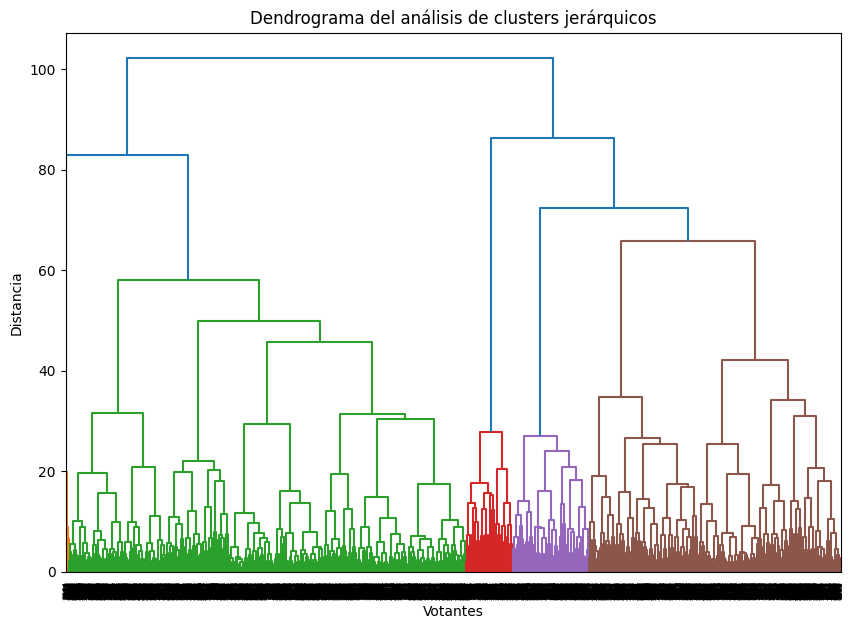

In [ ]:
# Cálculo de la matriz de distancias y linkage con método 'ward'
Z = linkage(df_cluster_scaled, method='ward')

# Generación del dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma del análisis de clusters jerárquicos")
dendrogram(Z)
plt.xlabel('Votantes')
plt.ylabel('Distancia')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Definimos el criterio de distancia para cortar el dendrograma
max_d = 40 # Puedes ajustar este valor según lo que observes en el dendrograma
clusters = fcluster(Z, max_d, criterion='distance')

# Añadimos los clusters al DataFrame original
df_filtered['Cluster'] = clusters

# Visualizamos cuántos individuos hay en cada cluster
print(df_filtered['Cluster'].value_counts())


Cluster
5     736
8     567
2     503
4     491
10    423
7     392
3     325
9     312
6     241
1      17
Name: count, dtype: int64


<ipython-input-101-de80b3f284a2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = clusters


Segun el dendograma hemo decidido cortar a la altura 40, parece haber una buena división

In [ ]:
# Agrupamos por los clusters generados y obtenemos estadísticas descriptivas

# Select all columns except 'INTENCIONGR_NOMBRE'
columns_to_include = [col for col in df_filtered.columns if col != 'INTENCIONGR_NOMBRE']

# Calculate the mean for the selected columns
cluster_profile = df_filtered[columns_to_include].groupby('Cluster').mean()

print(cluster_profile)

             CCAA      SEXO       EDAD        P0    PREFPTE   PROBVOTO  \
Cluster                                                                  
1        9.470588  1.352941  47.823529  1.000000  47.352941   9.000000   
2        8.373757  1.435388  43.658052  1.027833  77.930417   6.779324   
3        8.273846  1.430769  46.581538  1.036923  35.218462   8.864615   
4        8.395112  2.000000  44.753564  1.038697  25.207739   9.676171   
5        8.835598  1.100543  43.841033  1.044837  19.860054   9.573370   
6        7.813278  1.502075  58.161826  1.041494  47.692946  10.315353   
7        8.563776  1.489796  57.339286  1.038265  41.630102   8.609694   
8        8.234568  1.634921  40.707231  1.056437  37.395062   8.638448   
9        8.708333  1.352564  69.701923  1.028846  17.407051  10.019231   
10       8.430260  1.555556  68.371158  1.016548  49.193853   9.340426   

            SIMPATIA  PARTICIPACIONG    RECUVOTOG  NIVELESTENTREV  ...  \
Cluster                              

Cluster 1:

  *  CCAA: La media de 9.47 sugiere que la mayoría de los votantes en este grupo provienen de regiones como Madrid o Andalucía.
  * SEXO: Predominantemente hombres (1.35 en promedio, siendo 1 masculino y 2 femenino).
  * EDAD: Un grupo de edad madura, con una media de 47.82 años.
  * PREFPTE (Preferencia de partido): Media de 47.35, lo que indica que se sienten inclinados hacia partidos conservadores.
  * PROBVOTO (Probabilidad de votar): Alta probabilidad de votar, con una media de 9.0.
  *  RELIGION: El promedio de 2.64 sugiere que muchos se identifican con el catolicismo.
  *  ECIVIL (Estado civil): Mayoría casada o en unión, con una media de 1.41.
  * SITLAB (Situación laboral): Están mayoritariamente empleados, con un valor promedio de 1.
  *  RELALAB (Relación laboral): Relativamente estable, con una media de 2.41, lo que sugiere empleados asalariados.
  *  CNO11: Valor alto (99), indicando que algunos pueden estar en categorías no especificadas o sin datos.
  *  INGRESHOG (Ingresos del hogar): Media de 4.70, lo que sugiere ingresos medios-altos.
  *  CLASESOCIAL: Se sitúan en una clase social media-alta, con una media de 20.88.
  *  ESTUDIOS: Buen nivel educativo, con un promedio de 5.23, lo que sugiere niveles educativos superiores o universitarios.



Cluster 2:

    CCAA: Promedio de 8.37, lo que sugiere presencia de votantes en regiones como la Comunidad Valenciana o Galicia.
    SEXO: Ligeramente más hombres que mujeres (1.43).
    EDAD: Un grupo más joven que el anterior, con una media de 43.65 años.
    PREFPTE: Con 77.93, refleja una alta inclinación por partidos tradicionales.
    PROBVOTO: Media de 6.77, mostrando una probabilidad media-alta de votar.
    RELIGION: Media de 3.66, lo que indica mayor diversidad religiosa o menor identificación con el catolicismo.
    ECIVIL: Mayoritariamente casados o en relaciones (1.47).
    SITLAB: La mayoría tiene empleo, con un promedio de 1.0.
    RELALAB: Mayor estabilidad laboral que en otros grupos, con un promedio de 1.05.
    CNO11: Media de 3.41, lo que indica trabajos más administrativos o técnicos.
    INGRESHOG: Ingresos medios, con un promedio de 3.06.
    CLASESOCIAL: Clase media, con una media de 4.37.
    ESTUDIOS: Buen nivel educativo, con una media de 5.36.



Cluster 3:

    CCAA: Media de 8.27, lo que podría señalar votantes de regiones como Castilla y León o Galicia.
    SEXO: Predominan los hombres (1.43).
    EDAD: Grupo de edad media, con una media de 46.58 años.
    PREFPTE: Promedio de 35.21, lo que sugiere inclinación por partidos de derecha.
    PROBVOTO: Alta probabilidad de votar (8.86).
    RELIGION: Mayoritariamente católicos (media de 3.32).
    ECIVIL: Principalmente casados (1.51).
    SITLAB: Están empleados, con un promedio de 1.0.
    RELALAB: Relación laboral más estable que otros grupos (2.93).
    CNO11: Media de 3.09, indicando trabajos técnicos.
    INGRESHOG: Ingresos medios, con una media de 3.11.
    CLASESOCIAL: Clase media, con una media de 4.2.
    ESTUDIOS: Buen nivel educativo (5.28).




Cluster 4:

    CCAA: Media de 8.39, lo que sugiere presencia en regiones como Cataluña o Castilla y León.
    SEXO: Solo mujeres (2.0 en promedio).
    EDAD: Grupo de edad media, con 44.75 años de media.
    PREFPTE: Media de 25.20, con inclinaciones hacia la izquierda.
    PROBVOTO: Alta probabilidad de votar (9.67).
    RELIGION: Más diversidad religiosa (media de 3.60).
    ECIVIL: Principalmente casados o en relaciones (1.54).
    SITLAB: Mayor variedad en situación laboral (media de 1.05).
    RELALAB: Menor estabilidad laboral (0.95).
    CNO11: Media de 2.71, sugiriendo trabajos administrativos.
    INGRESHOG: Ingresos medios-bajos (2.86).
    CLASESOCIAL: Clase media-baja, con una media de 3.94.
    ESTUDIOS: Alto nivel educativo (5.83).



Cluster 5:

    CCAA: Media de 8.83, reflejando votantes en el sur o en regiones como Extremadura.
    SEXO: Principalmente hombres (1.10).
    EDAD: Grupo joven-adulto, con una media de 43.84 años.
    PREFPTE: Media de 19.86, lo que indica preferencias más centradas.
    PROBVOTO: Alta probabilidad de votar (9.57).
    RELIGION: Mayoritariamente católicos (media de 3.54).
    ECIVIL: La mayoría casados o en relaciones (1.44).
    SITLAB: Están empleados (media de 1.0).
    RELALAB: Relación laboral moderadamente estable (1.01).
    CNO11: Media de 3.92, reflejando trabajos técnicos.
    INGRESHOG: Ingresos medios (2.97).
    CLASESOCIAL: Clase media (4.48).
    ESTUDIOS: Buen nivel educativo (5.18).



Cluster 6:

    CCAA: Media de 7.81, votantes de regiones menos pobladas.
    SEXO: Más hombres (1.50).
    EDAD: Grupo mayor, con una media de 58.16 años.
    PREFPTE: Media de 47.69, inclinados hacia la derecha.
    PROBVOTO: Muy alta probabilidad de votar (10.31).
    RELIGION: Mayor diversidad religiosa (3.19).
    ECIVIL: Mayoritariamente casados (2.04).
    SITLAB: Variedad en la situación laboral (media de 2.39).
    RELALAB: Baja estabilidad laboral (0.59).
    CNO11: Media de 1.64, reflejando trabajos manuales o de baja cualificación.
    INGRESHOG: Ingresos medios-altos (4.48).
    CLASESOCIAL: Clase social alta (97.19).
    ESTUDIOS: Nivel educativo algo más bajo (4.39).



Cluster 7:

    CCAA: Media de 8.56, con votantes de regiones como Galicia o Castilla-La Mancha.
    SEXO: Predominan los hombres (1.48).
    EDAD: Grupo mayor, con una media de 57.33 años.
    PREFPTE: Media de 41.63, inclinados hacia la derecha.
    PROBVOTO: Alta probabilidad de votar (8.60).
    RELIGION: Media de 3.38, mayor diversidad religiosa.
    ECIVIL: La mayoría casados o en relaciones (4.64).
    SITLAB: Variedad en la situación laboral (1.83).
    RELALAB: Moderada estabilidad laboral (0.71).
    CNO11: Media de 2.17, reflejando trabajos manuales.
    INGRESHOG: Ingresos medios-altos (4.00).
    CLASESOCIAL: Clase media-alta (5.08).
    ESTUDIOS: Buen nivel educativo (4.96).

Cluster 8:

    CCAA: Media de 8.23, con votantes distribuidos en varias regiones.
    SEXO: Mayoría de mujeres (1.63).
    EDAD: Es el grupo más joven, con una media de 40.70 años.
    PREFPTE (Preferencia de partido): Con una media de 37.39, muestra inclinaciones hacia partidos de izquierda o progresistas.
    PROBVOTO (Probabilidad de votar): Probabilidad media-alta de votar (8.63).
    RELIGION: Más diversidad religiosa, con una media de 3.39.
    ECIVIL (Estado civil): Mayoría en relaciones o casados (1.68).
    SITLAB (Situación laboral): Predomina el empleo, pero con una gran variedad en situación laboral (5.42), lo que sugiere trabajos en sectores menos estables.
    RELALAB (Relación laboral): Sin relación laboral aparente (media de 0.0), lo que puede indicar autónomos o personas sin contrato formal.
    CNO11: Valor bajo (0.0), lo que sugiere trabajos menos cualificados.
    INGRESHOG (Ingresos del hogar): Ingresos medios-altos, con una media de 4.30.
    CLASESOCIAL: Se sitúan en la clase media-alta (5.12).
    ESTUDIOS: Buen nivel educativo, con una media de 4.60, lo que sugiere que muchos poseen educación superior.

Cluster 9:

    CCAA: Media de 8.71, lo que indica votantes de comunidades más conservadoras, posiblemente como Castilla y León o Galicia.
    SEXO: Ligeramente más hombres que mujeres (1.35).
    EDAD: Es el grupo de mayor edad, con una media de 69.70 años.
    PREFPTE: Con una media de 17.41, este grupo parece tener preferencias hacia partidos más conservadores.
    PROBVOTO: Alta probabilidad de votar, con una media de 10.02.
    RELIGION: Media de 3.17, lo que sugiere una base religiosa más homogénea, probablemente católica.
    ECIVIL: Principalmente casados o en relaciones (1.22).
    SITLAB: Variedad en la situación laboral, pero con una tendencia hacia el empleo (2.10).
    RELALAB: Sin relación laboral aparente (media de 0.0), lo que podría deberse a jubilados o personas sin contrato formal.
    CNO11: Media de 0.0, lo que sugiere trabajos no cualificados o personas fuera del mercado laboral.
    INGRESHOG: Ingresos medios, con una media de 2.92.
    CLASESOCIAL: Clase media-baja, con una media de 3.58.
    ESTUDIOS: Buen nivel educativo (5.60).

Cluster 10:

    CCAA: Media de 8.43, sugiriendo votantes de regiones como Andalucía o Murcia.
    SEXO: Predominan los hombres (1.55).
    EDAD: Un grupo de mayor edad, con una media de 68.37 años.
    PREFPTE: Inclinaciones políticas hacia el centro-derecha, con una media de 49.19.
    PROBVOTO: Alta probabilidad de votar (9.34).
    RELIGION: Relativamente más diversificados en términos de religión, con una media de 2.85.
    ECIVIL: Principalmente casados o en relaciones (1.60).
    SITLAB: Variedad en la situación laboral (2.16), lo que indica que algunos podrían estar retirados.
    RELALAB: Baja relación laboral (0.10), lo que podría indicar personas fuera del mercado laboral, como jubilados.
    CNO11: Bajo (0.27), indicando trabajos de baja cualificación o inexistencia de empleo.
    INGRESHOG: Ingresos medios-altos, con una media de 4.96.
    CLASESOCIAL: Clase social media-alta (5.04).
    ESTUDIOS: Un nivel educativo más bajo, con una media de 3.89.

In [ ]:
pd.set_option('display.max_rows', None)  # Muestra todas las filas
voto_por_cluster = df_filtered.groupby(['Cluster', 'INTENCIONGR']).size().reset_index(name='Count')
print(voto_por_cluster)


     Cluster  INTENCIONGR  Count
0          1            1      1
1          1            2      5
2          1            3      3
3          1         8996      1
4          1         9977      1
5          1         9998      3
6          1         9999      3
7          2         8995     56
8          2         8996     59
9          2         9977     28
10         2         9997    110
11         2         9998    202
12         2         9999     48
13         3            1     57
14         3            2     87
15         3            3     33
16         3            6      2
17         3            8      8
18         3           21     30
19         3           28     10
20         3          901      8
21         3          902      4
22         3         1201      5
23         3         1601      2
24         3         1602      2
25         3         8995      5
26         3         8996      6
27         3         9977      5
28         3         9997     17
29        

<Figure size 1000x600 with 0 Axes>

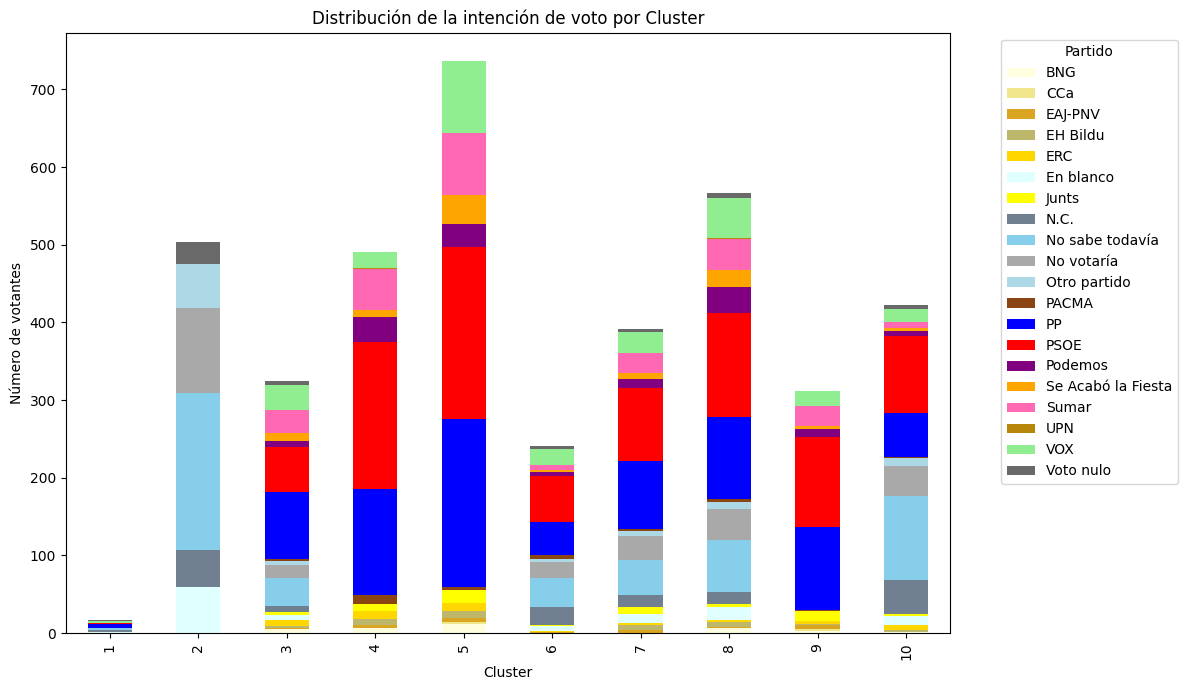

In [ ]:
# Diccionario para mapear los valores de INTENCIONGR a los nombres de los partidos
partidos_dict = {
    1: 'PSOE',
    2: 'PP',
    3: 'VOX',
    6: 'PACMA',
    8: 'Podemos',
    21: 'Sumar',
    28: 'Se Acabó la Fiesta',
    503: 'CCa',
    901: 'ERC',
    902: 'Junts',
    1201: 'BNG',
    1501: 'UPN',
    1601: 'EAJ-PNV',
    1602: 'EH Bildu',
    8995: 'Otro partido',
    8996: 'En blanco',
    9977: 'Voto nulo',
    9997: 'No votaría',
    9998: 'No sabe todavía',
    9999: 'N.C.'
}

# Diccionario de colores para los partidos y opciones con las nuevas especificaciones
colores_partidos = {
    'PSOE': 'red',
    'PP': 'blue',
    'VOX': 'lightgreen',  # Verde más claro para VOX
    'Sumar': 'hotpink',  # Rosa para Sumar
    'PACMA': 'saddlebrown',  # Tonos marrones para PACMA
    'Podemos': 'purple',
    'Se Acabó la Fiesta': 'orange',
    'CCa': 'khaki',  # Tonos amarillos para CCa
    'ERC': 'gold',  # Amarillo para ERC
    'Junts': 'yellow',  # Amarillo para Junts
    'BNG': 'lightyellow',  # Amarillo claro para BNG
    'UPN': 'darkgoldenrod',  # Tonos marrones para UPN
    'EAJ-PNV': 'goldenrod',  # Tonos amarillos para EAJ-PNV
    'EH Bildu': 'darkkhaki',  # Amarillo más oscuro para EH Bildu
    'Otro partido': 'lightblue',  # Azul claro para 'Otro partido'
    'En blanco': 'lightcyan',  # Azul claro para 'En blanco'
    'Voto nulo': 'dimgray',  # Tonos grises para 'Voto nulo'
    'No votaría': 'darkgray',  # Gris oscuro para 'No votaría'
    'No sabe todavía': 'skyblue',  # Azul claro para 'No sabe todavía'
    'N.C.': 'slategray'  # Gris oscuro para 'N.C.'
}

# Aplicamos el mapeo de INTENCIONGR a los nombres de los partidos
voto_por_cluster['INTENCIONGR'] = voto_por_cluster['INTENCIONGR'].map(partidos_dict)

# Creamos una tabla pivote para reorganizar los datos y prepararlos para el gráfico
pivot_data = voto_por_cluster.pivot(index='Cluster', columns='INTENCIONGR', values='Count').fillna(0)

# Configuramos el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Obtenemos los colores basados en el orden de los partidos en el gráfico
colores = [colores_partidos[col] for col in pivot_data.columns]

# Hacemos el gráfico de barras apiladas con los colores personalizados
pivot_data.plot(kind='bar', stacked=True, color=colores, figsize=(12, 7))

# Añadimos etiquetas y título
plt.title('Distribución de la intención de voto por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de votantes')

# Mostramos el gráfico con los nombres de los partidos
plt.legend(title='Partido', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#1. Agrupar por Cluster e Intención de Voto: Primero, necesitas agrupar los datos por Cluster e INTENCIONGR (intención de voto)
# y contar la frecuencia de cada partido en cada cluster
votos_por_cluster_partido = df_filtered.groupby(['Cluster', 'INTENCIONGR']).size().reset_index(name='Count')


In [ ]:
#Mapear los Códigos de Partido a Nombres: Luego, mapea los códigos de INTENCIONGR a los nombres de los partidos utilizando el diccionario partidos_dict:
votos_por_cluster_partido['Partido'] = votos_por_cluster_partido['INTENCIONGR'].map(partidos_dict)

In [ ]:
# Ordenar y Obtener los 3 Principales: Dentro de cada cluster, ordena los partidos por el número de votos (Count) en orden descendente y selecciona los 3 primeros:
top_3_partidos_por_cluster = votos_por_cluster_partido.groupby('Cluster').apply(lambda x: x.sort_values('Count', ascending=False).head(6)).reset_index(drop=True)

<ipython-input-107-524167d0e722>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_partidos_por_cluster = votos_por_cluster_partido.groupby('Cluster').apply(lambda x: x.sort_values('Count', ascending=False).head(6)).reset_index(drop=True)


<ipython-input-108-72eabb6a203f>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(partidos_dict))  # Color map para los partidos


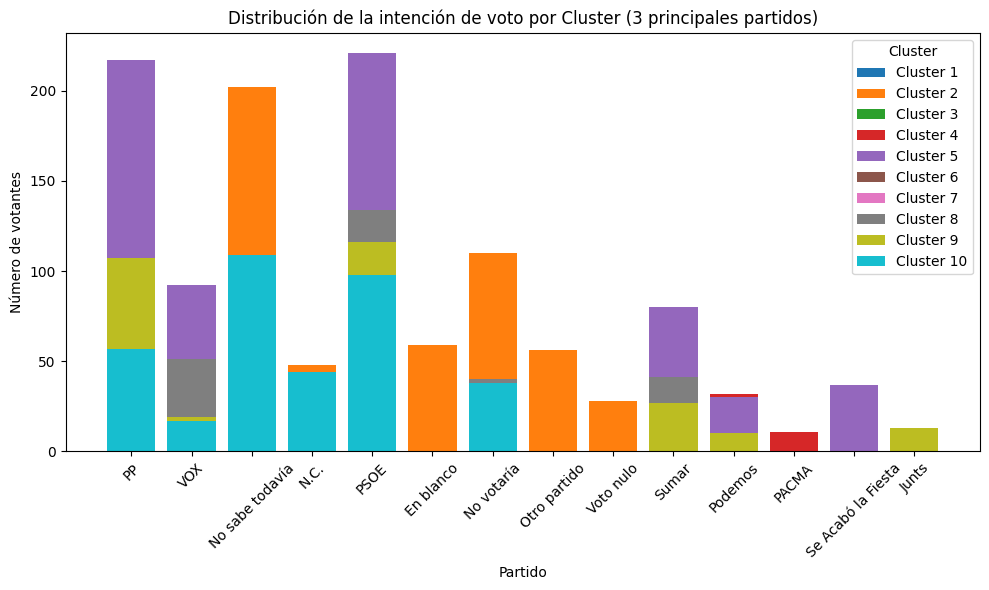

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Creamos el diccionario con los nombres de los partidos
partidos_dict = {
    1: 'PSOE',
    2: 'PP',
    3: 'VOX',
    6: 'PACMA',
    8: 'Podemos',
    21: 'Sumar',
    28: 'Se Acabó la Fiesta',
    503: 'CCa',
    901: 'ERC',
    902: 'Junts',
    1201: 'BNG',
    1501: 'UPN',
    1601: 'EAJ-PNV',
    1602: 'EH Bildu',
    8995: 'Otro partido',
    8996: 'En blanco',
    9977: 'Voto nulo',
    9997: 'No votaría',
    9998: 'No sabe todavía',
    9999: 'N.C.'
}


# Asignamos los nombres de los partidos a la columna INTENCIONGR
top_3_partidos_por_cluster['Partido'] = top_3_partidos_por_cluster['INTENCIONGR'].map(partidos_dict)

# Gráfico de barras apiladas para los 3 principales partidos de cada cluster
fig, ax = plt.subplots(figsize=(10, 6))

# Creamos una lista de colores para cada partido
colors = plt.cm.get_cmap('tab20', len(partidos_dict))  # Color map para los partidos

# Agrupamos por cluster y creamos un gráfico de barras apiladas
for cluster in top_3_partidos_por_cluster['Cluster'].unique():
    cluster_data = top_3_partidos_por_cluster[top_3_partidos_por_cluster['Cluster'] == cluster]
    ax.bar(cluster_data['Partido'], cluster_data['Count'], label=f'Cluster {cluster}')

# Añadimos etiquetas y título
ax.set_xlabel('Partido')
ax.set_ylabel('Número de votantes')
ax.set_title('Distribución de la intención de voto por Cluster (3 principales partidos)')

# Mostramos la leyenda y ajustamos el diseño
ax.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


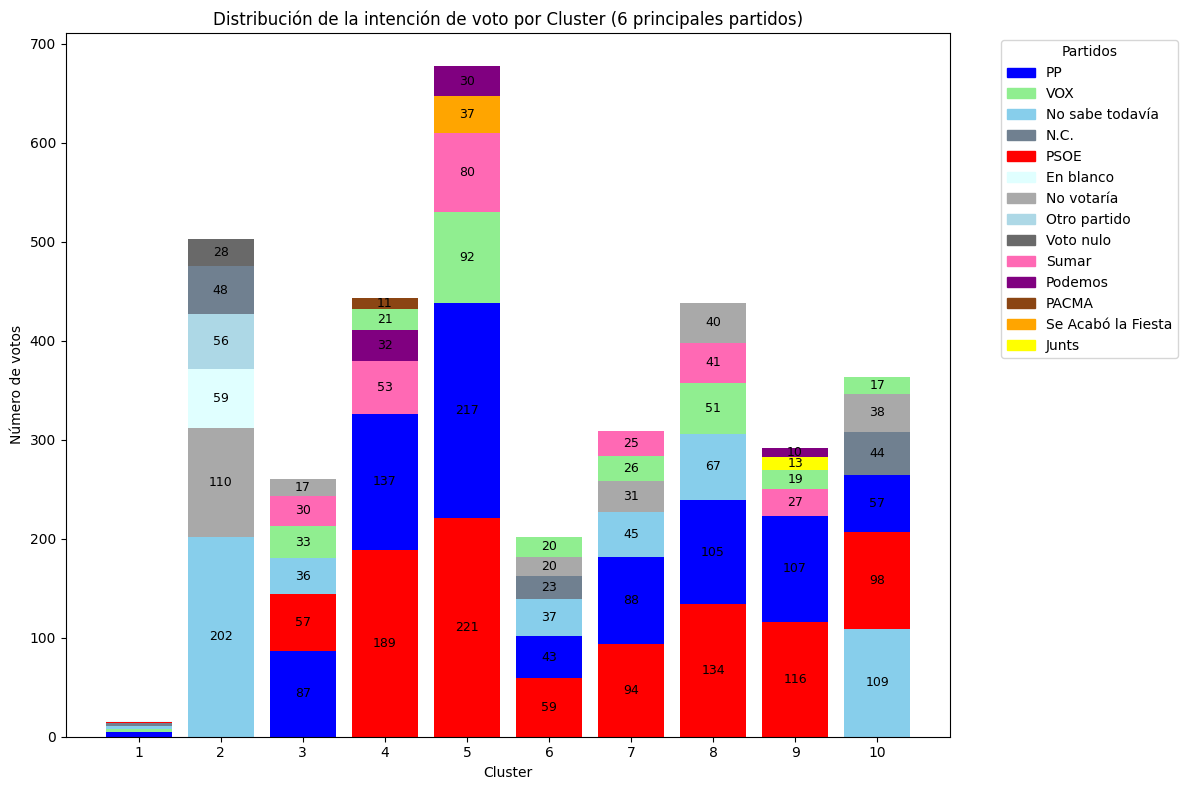

In [ ]:
import matplotlib.pyplot as plt

# Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Diccionario para evitar que se dupliquen las entradas de la leyenda
handles_legends = {}

# Agrupamos por cada cluster y creamos las barras apiladas con colores únicos para cada partido
for cluster in top_3_partidos_por_cluster['Cluster'].unique():
    cluster_data = top_3_partidos_por_cluster[top_3_partidos_por_cluster['Cluster'] == cluster]
    partidos = [partidos_dict[val] for val in cluster_data['INTENCIONGR']]
    colores = [colores_partidos[partido] for partido in partidos]

    # Añadir las barras y asignar el color del partido
    bottom_val = 0
    for idx, partido in enumerate(partidos):
        count = cluster_data.iloc[idx]['Count']
        plt.bar(cluster, count, label=partido if partido not in handles_legends else "",
                color=colores[idx], bottom=bottom_val)
        # Añadir el conteo dentro de la barra con fuente en negro, pero solo si no es Cluster 1
        if cluster != 1:
            plt.text(cluster, bottom_val + count / 2, str(count), ha='center', va='center', fontsize=9, color='black')
        bottom_val += count
        # Guardar los partidos ya utilizados para evitar duplicados en la leyenda
        handles_legends[partido] = plt.Rectangle((0, 0), 1, 1, color=colores[idx])

# Etiquetas y título
plt.ylabel('Número de votos')
plt.xlabel('Cluster')
plt.title('Distribución de la intención de voto por Cluster (6 principales partidos)')

# Asegurar que se muestren todos los números en el eje x
plt.xticks(top_3_partidos_por_cluster['Cluster'].unique())

# Mostrar la leyenda con los colores correctos
plt.legend(handles=handles_legends.values(), labels=handles_legends.keys(), title="Partidos", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()




--

**Cluster 1:**

- **Comunidad Autónoma (CCAA):** Predominio en la comunidad número 9 (Cataluña).
- **Sexo:** Mayoría de hombres (SEXO = 1.35).
- **Edad media:** 47.8 años.
- **Nacionalidad (P0):** Española (1.00).
- **Probabilidad de voto (PROBVOTO):** Alta (9.00 sobre 10).
- **Nivel de estudios (NIVELESTENTREV):** Muy alto (14.00, corresponde a Doctorado).
- **Situación laboral (SITLAB):** Trabajan (1.00).
- **Ingresos del hogar (INGRESHOG):** Entre 1,801 y 2,700 € (4.70).
- **Clase social (CLASESOCIAL):** Valor alto, pero requiere más contexto.

**Perfil general:** Hombres de mediana edad, con doctorado, empleados y con ingresos moderados, alta probabilidad de votar.

---

**Cluster 2:**

- **Sexo:** Mayoría de hombres (1.43).
- **Edad media:** 43.7 años.
- **Nacionalidad:** Principalmente española.
- **Probabilidad de voto:** Moderada (6.78).
- **Nivel de estudios:** Alto (9.27, posiblemente diplomatura o grado).
- **Situación laboral:** Trabajan.
- **Ingresos del hogar:** Entre 2,701 y 3,900 € (3.07).
- **Clase social:** Media.

**Perfil general:** Hombres jóvenes-adultos, con estudios superiores, ingresos medios-altos y probabilidad moderada de votar.

---

**Cluster 3:**

- **Sexo:** Mayoría de hombres (1.43).
- **Edad media:** 46.6 años.
- **Nacionalidad:** Principalmente española.
- **Probabilidad de voto:** Alta (8.86).
- **Nivel de estudios:** Alto (9.21).
- **Situación laboral:** Trabajan.
- **Ingresos del hogar:** Medios (3.11).

**Perfil general:** Hombres de mediana edad, con estudios superiores, ingresos medios y alta probabilidad de votar.

---

**Cluster 4:**

- **Sexo:** Exclusivamente mujeres (2.00).
- **Edad media:** 44.75 años.
- **Nacionalidad:** Principalmente española.
- **Probabilidad de voto:** Muy alta (9.68).
- **Nivel de estudios:** Alto (10.66).
- **Situación laboral:** Trabajan (1.06).
- **Ingresos del hogar:** Medios (2.86).

**Perfil general:** Mujeres de mediana edad, con estudios universitarios, empleadas y con muy alta probabilidad de votar.

---

**Cluster 5:**

- **Sexo:** Mayoría de hombres (1.10).
- **Edad media:** 43.84 años.
- **Nacionalidad:** Principalmente española.
- **Probabilidad de voto:** Muy alta (9.57).
- **Nivel de estudios:** Alto (8.74).
- **Situación laboral:** Trabajan.
- **Ingresos del hogar:** Medios (2.97).

**Perfil general:** Hombres jóvenes-adultos, con estudios superiores, empleados y con muy alta probabilidad de votar.

---

**Cluster 6:**

- **Sexo:** Equilibrado (1.50).
- **Edad media:** 58.16 años.
- **Nacionalidad:** Principalmente española.
- **Probabilidad de voto:** Muy alta (10.32).
- **Nivel de estudios:** Medio (7.14).
- **Situación laboral:** Jubilados o pensionistas (2.40).
- **Ingresos del hogar:** Moderados (4.49).

**Perfil general:** Personas mayores, mixto en género, jubilados con estudios medios y muy alta probabilidad de votar.

---

**Cluster 7:**

- **Sexo:** Mayoría de hombres (1.49).
- **Edad media:** 57.34 años.
- **Nacionalidad:** Principalmente española.
- **Probabilidad de voto:** Alta (8.61).
- **Nivel de estudios:** Medio-alto (8.14).
- **Situación laboral:** Entre trabajadores y jubilados (1.84).
- **Ingresos del hogar:** Moderados (4.01).

**Perfil general:** Hombres mayores, con estudios medios, algunos aún trabajando y alta probabilidad de voto.

---

**Cluster 8:**

- **Sexo:** Mayoría de mujeres (1.63).
- **Edad media:** 40.71 años.
- **Nacionalidad:** Principalmente española.
- **Probabilidad de voto:** Alta (8.64).
- **Nivel de estudios:** Medio (7.21).
- **Situación laboral:** Trabajo doméstico no remunerado (5.42).
- **Ingresos del hogar:** Moderados (4.31).

**Perfil general:** Mujeres jóvenes, dedicadas al hogar, con estudios medios y alta probabilidad de votar.

---

**Cluster 9:**

- **Sexo:** Mayoría de hombres (1.35).
- **Edad media:** 69.70 años.
- **Nacionalidad:** Principalmente española.
- **Probabilidad de voto:** Muy alta (10.02).
- **Nivel de estudios:** Alto (9.63).
- **Situación laboral:** Jubilados (2.10).
- **Ingresos del hogar:** Medios (2.92).

**Perfil general:** Hombres de edad avanzada, jubilados con estudios superiores y muy alta probabilidad de votar.

---

**Cluster 10:**

- **Sexo:** Mayoría de mujeres (1.56).
- **Edad media:** 68.37 años.
- **Nacionalidad:** Principalmente española.
- **Probabilidad de voto:** Muy alta (9.34).
- **Nivel de estudios:** Bajo (6.13).
- **Situación laboral:** Jubiladas (2.16).
- **Ingresos del hogar:** Moderados (4.96).

**Perfil general:** Mujeres de edad avanzada, jubiladas con estudios básicos y muy alta probabilidad de votar.

---

**Observaciones generales:**

- **Edad:** Los clusters 6, 7, 9 y 10 agrupan a personas de mayor edad, muchos jubilados, con alta participación electoral.
- **Género:** Clusters 4, 8 y 10 tienen mayor proporción de mujeres.
- **Situación laboral:** Clusters 1-5 predominan los trabajadores; clusters 6-10 hay más jubilados y amas de casa.
- **Nivel educativo:** Clusters 1 y 4 tienen niveles educativos más altos.
- **Probabilidad de voto:** Generalmente alta en todos los clusters, destacando clusters 4, 6, 9 y 10.

---


In [ ]:
# Agrupamos los datos por cluster y generamos la salida en texto
for cluster in top_3_partidos_por_cluster['Cluster'].unique():
    cluster_data = top_3_partidos_por_cluster[top_3_partidos_por_cluster['Cluster'] == cluster]
    print(f"Cluster {cluster}:\n")
    for _, row in cluster_data.iterrows():
        partido = partidos_dict[row['INTENCIONGR']]
        count = row['Count']
        print(f"{partido}: {count} votos")
    print("\n")  # Espacio entre clusters


Cluster 1:

PP: 5 votos
VOX: 3 votos
No sabe todavía: 3 votos
N.C.: 3 votos
PSOE: 1 votos
En blanco: 1 votos


Cluster 2:

No sabe todavía: 202 votos
No votaría: 110 votos
En blanco: 59 votos
Otro partido: 56 votos
N.C.: 48 votos
Voto nulo: 28 votos


Cluster 3:

PP: 87 votos
PSOE: 57 votos
No sabe todavía: 36 votos
VOX: 33 votos
Sumar: 30 votos
No votaría: 17 votos


Cluster 4:

PSOE: 189 votos
PP: 137 votos
Sumar: 53 votos
Podemos: 32 votos
VOX: 21 votos
PACMA: 11 votos


Cluster 5:

PSOE: 221 votos
PP: 217 votos
VOX: 92 votos
Sumar: 80 votos
Se Acabó la Fiesta: 37 votos
Podemos: 30 votos


Cluster 6:

PSOE: 59 votos
PP: 43 votos
No sabe todavía: 37 votos
N.C.: 23 votos
No votaría: 20 votos
VOX: 20 votos


Cluster 7:

PSOE: 94 votos
PP: 88 votos
No sabe todavía: 45 votos
No votaría: 31 votos
VOX: 26 votos
Sumar: 25 votos


Cluster 8:

PSOE: 134 votos
PP: 105 votos
No sabe todavía: 67 votos
VOX: 51 votos
Sumar: 41 votos
No votaría: 40 votos


Cluster 9:

PSOE: 116 votos
PP: 107 votos



---

### **Cluster 1:**

**Perfil:**

- **Sexo:** Mayoría de hombres.
- **Edad media:** 47.8 años.
- **Nivel de estudios:** Muy alto (Doctorado).
- **Situación laboral:** Trabajan.
- **Ingresos del hogar:** Entre 1,801 y 2,700 €.
- **Alta probabilidad de votar.**

**Intención de voto:**

- **PP:** 5 votos (31.25%)
- **VOX:** 3 votos (18.75%)
- **No sabe todavía:** 3 votos (18.75%)
- **N.C. (No contesta):** 3 votos (18.75%)
- **PSOE:** 1 voto (6.25%)
- **En blanco:** 1 voto (6.25%)

**Conclusiones:**

- Este cluster, compuesto por hombres de mediana edad, altamente educados y con empleo, muestra una preferencia significativa hacia partidos de derecha, especialmente el PP y VOX.
- Sin embargo, hay una proporción considerable de indecisos o que no contestan (37.5%), lo que indica cierta reserva o indecisión en revelar su preferencia política.
- La baja representación del PSOE sugiere que este grupo se inclina más hacia opciones conservadoras.

---

### **Cluster 2:**

**Perfil:**

- **Sexo:** Mayoría de hombres.
- **Edad media:** 43.7 años.
- **Nivel de estudios:** Alto.
- **Situación laboral:** Trabajan.
- **Ingresos del hogar:** Entre 2,701 y 3,900 €.
- **Probabilidad de voto moderada.**

**Intención de voto:**

- **No sabe todavía:** 202 votos (40.16%)
- **No votaría:** 110 votos (21.87%)
- **En blanco:** 59 votos (11.73%)
- **Otro partido:** 56 votos (11.13%)
- **N.C.:** 48 votos (9.54%)
- **Voto nulo:** 28 votos (5.57%)

**Conclusiones:**

- Este cluster muestra un alto nivel de indecisión o desafección política, con más del 40% sin decidir su voto y un 21.87% que declara que no votaría.
- La significativa preferencia por "Otro partido" indica que podrían estar buscando alternativas fuera de los partidos tradicionales.
- El perfil sugiere que, a pesar de tener estudios e ingresos altos, este grupo está desencantado con la política actual o no se siente representado por las opciones existentes.

---

### **Cluster 3:**

**Perfil:**

- **Sexo:** Mayoría de hombres.
- **Edad media:** 46.6 años.
- **Nivel de estudios:** Alto.
- **Situación laboral:** Trabajan.
- **Ingresos del hogar:** Medios.
- **Alta probabilidad de votar.**

**Intención de voto:**

- **PP:** 87 votos (33.46%)
- **PSOE:** 57 votos (21.92%)
- **No sabe todavía:** 36 votos (13.85%)
- **VOX:** 33 votos (12.69%)
- **Sumar:** 30 votos (11.54%)
- **No votaría:** 17 votos (6.54%)

**Conclusiones:**

- Este cluster presenta una clara inclinación hacia el PP, seguido por el PSOE y VOX, lo que indica una tendencia hacia la derecha política.
- La presencia de Sumar sugiere también interés en opciones progresistas, reflejando cierta diversidad ideológica.
- El alto nivel de estudios y la probabilidad de votar se correlacionan con una participación activa y decisiones políticas más definidas.

---

### **Cluster 4:**

**Perfil:**

- **Sexo:** Exclusivamente mujeres.
- **Edad media:** 44.75 años.
- **Nivel de estudios:** Alto.
- **Situación laboral:** Trabajan.
- **Ingresos del hogar:** Medios.
- **Muy alta probabilidad de votar.**

**Intención de voto:**

- **PSOE:** 189 votos (42.66%)
- **PP:** 137 votos (30.93%)
- **Sumar:** 53 votos (11.96%)
- **Podemos:** 32 votos (7.22%)
- **VOX:** 21 votos (4.74%)
- **PACMA:** 11 votos (2.48%)

**Conclusiones:**

- Este grupo de mujeres altamente educadas muestra una fuerte preferencia por partidos de izquierda, especialmente el PSOE.
- La presencia significativa de Sumar y Podemos refuerza la tendencia progresista del cluster.
- Aunque el PP también tiene una representación importante, la mayoría se inclina hacia opciones políticas de centro-izquierda.

---

### **Cluster 5:**

**Perfil:**

- **Sexo:** Mayoría de hombres.
- **Edad media:** 43.84 años.
- **Nivel de estudios:** Alto.
- **Situación laboral:** Trabajan.
- **Ingresos del hogar:** Medios.
- **Muy alta probabilidad de votar.**

**Intención de voto:**

- **PSOE:** 221 votos (32.64%)
- **PP:** 217 votos (32.05%)
- **VOX:** 92 votos (13.59%)
- **Sumar:** 80 votos (11.82%)
- **Se Acabó la Fiesta:** 37 votos (5.47%)
- **Podemos:** 30 votos (4.43%)

**Conclusiones:**

- Este cluster está políticamente dividido entre el PSOE y el PP, reflejando una polarización entre centro-izquierda y centro-derecha.
- La presencia notable de VOX y Sumar indica que hay segmentos que se inclinan hacia posiciones más extremas en ambos lados del espectro político.
- El interés en "Se Acabó la Fiesta" sugiere que algunos buscan alternativas nuevas o están insatisfechos con los partidos tradicionales.

---

### **Cluster 6:**

**Perfil:**

- **Sexo:** Equilibrado entre hombres y mujeres.
- **Edad media:** 58.16 años.
- **Nivel de estudios:** Medio.
- **Situación laboral:** Jubilados o pensionistas.
- **Ingresos del hogar:** Moderados.
- **Muy alta probabilidad de votar.**

**Intención de voto:**

- **PSOE:** 59 votos (29.21%)
- **PP:** 43 votos (21.29%)
- **No sabe todavía:** 37 votos (18.32%)
- **N.C.:** 23 votos (11.39%)
- **No votaría:** 20 votos (9.90%)
- **VOX:** 20 votos (9.90%)

**Conclusiones:**

- Los jubilados de este cluster muestran una preferencia por el PSOE, aunque hay una proporción significativa de indecisos.
- La presencia de VOX y el porcentaje de quienes no votarían reflejan cierta insatisfacción o búsqueda de opciones alternativas.
- Dada su alta probabilidad de votar, estos indecisos podrían ser clave en influir en los resultados electorales.

---

### **Cluster 7:**

**Perfil:**

- **Sexo:** Mayoría de hombres.
- **Edad media:** 57.34 años.
- **Nivel de estudios:** Medio-alto.
- **Situación laboral:** Algunos trabajan, otros jubilados.
- **Ingresos del hogar:** Moderados.
- **Alta probabilidad de votar.**

**Intención de voto:**

- **PSOE:** 94 votos (30.42%)
- **PP:** 88 votos (28.48%)
- **No sabe todavía:** 45 votos (14.56%)
- **No votaría:** 31 votos (10.03%)
- **VOX:** 26 votos (8.41%)
- **Sumar:** 25 votos (8.09%)

**Conclusiones:**

- Al igual que en el Cluster 5, hay una división entre PSOE y PP.
- El porcentaje de indecisos y quienes no votarían es significativo, lo que podría cambiar las tendencias dependiendo de cómo se decidan.
- La presencia de VOX y Sumar indica diversidad en las preferencias políticas dentro del cluster.

---

### **Cluster 8:**

**Perfil:**

- **Sexo:** Mayoría de mujeres.
- **Edad media:** 40.71 años.
- **Nivel de estudios:** Medio.
- **Situación laboral:** Trabajo doméstico no remunerado.
- **Ingresos del hogar:** Moderados.
- **Alta probabilidad de votar.**

**Intención de voto:**

- **PSOE:** 134 votos (30.59%)
- **PP:** 105 votos (23.97%)
- **No sabe todavía:** 67 votos (15.30%)
- **VOX:** 51 votos (11.64%)
- **Sumar:** 41 votos (9.36%)
- **No votaría:** 40 votos (9.13%)

**Conclusiones:**

- Este grupo de mujeres dedicadas al hogar muestra una preferencia hacia el PSOE, aunque el PP también tiene una presencia importante.
- El porcentaje de indecisas es notable, lo que podría influir en el resultado final.
- La diversidad de opciones, incluyendo VOX y Sumar, refleja distintas inquietudes y prioridades dentro del grupo.

---

### **Cluster 9:**

**Perfil:**

- **Sexo:** Mayoría de hombres.
- **Edad media:** 69.7 años.
- **Nivel de estudios:** Alto.
- **Situación laboral:** Jubilados.
- **Ingresos del hogar:** Medios.
- **Muy alta probabilidad de votar.**

**Intención de voto:**

- **PSOE:** 116 votos (39.73%)
- **PP:** 107 votos (36.64%)
- **Sumar:** 27 votos (9.25%)
- **VOX:** 19 votos (6.51%)
- **Junts:** 13 votos (4.45%)
- **Podemos:** 10 votos (3.42%)

**Conclusiones:**

- Este cluster de hombres mayores y altamente educados está dividido principalmente entre el PSOE y el PP.
- La presencia de Junts sugiere que algunos votantes tienen inclinaciones nacionalistas catalanas, lo cual es consistente si consideramos que la CCAA predominante es Cataluña.
- Su alta probabilidad de votar y experiencia podrían hacerlos un grupo electoralmente influyente.

---

### **Cluster 10:**

**Perfil:**

- **Sexo:** Mayoría de mujeres.
- **Edad media:** 68.37 años.
- **Nivel de estudios:** Bajo.
- **Situación laboral:** Jubiladas.
- **Ingresos del hogar:** Moderados.
- **Muy alta probabilidad de votar.**

**Intención de voto:**

- **No sabe todavía:** 109 votos (30.03%)
- **PSOE:** 98 votos (27.00%)
- **PP:** 57 votos (15.70%)
- **N.C.:** 44 votos (12.12%)
- **No votaría:** 38 votos (10.47%)
- **VOX:** 17 votos (4.68%)

**Conclusiones:**

- Hay una alta proporción de indecisas o que no contestan, lo que indica reserva o falta de decisión en su preferencia electoral.
- El PSOE es el partido con mayor intención de voto declarado, seguido por el PP.
- Dado que se trata de mujeres mayores con menor nivel educativo, podrían ser más conservadoras en expresar sus preferencias políticas.

---

### **Conclusiones generales:**

- **División política:** Los clusters muestran una clara división entre el PSOE y el PP, con variaciones dependiendo de la edad, sexo y nivel educativo.
- **Indecisión electoral:** Hay una proporción significativa de indecisos, especialmente en clusters con menor nivel educativo o entre los más jóvenes.
- **Participación electoral:** La mayoría de los clusters presenta una alta probabilidad de votar, lo que indica un electorado activo.
- **Preferencias por edad y sexo:**
  - **Mujeres:** Tienden a inclinarse más hacia el PSOE y partidos de izquierda (Clusters 4, 8 y 10).
  - **Hombres:** Muestran preferencias más divididas, con una ligera inclinación hacia partidos de derecha en algunos clusters (Clusters 1, 3 y 5).
- **Impacto de la educación:** Los clusters con niveles educativos más altos tienden a tener preferencias políticas más definidas y participan más activamente en el proceso electoral.
- **Presencia de nuevos partidos:** La aparición de partidos como Sumar y "Se Acabó la Fiesta" refleja un interés en alternativas políticas y posibles cambios en el panorama electoral.

---